In [61]:
import os

import gzip

import pandas as pd

import numpy as np
np.random.seed(1000)

from matplotlib import pyplot as plt
import seaborn as sns
plt.tight_layout()
sns.set(style="whitegrid")
sns.set_palette((sns.color_palette('colorblind', 8)))
dims = (11.7, 8.27)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler

import time
import datetime
import math
import random

In [63]:
def load_mnist(path, kind='train'):
    ## Load MNIST function. Retrieved from https://github.com/zalandoresearch/fashion-mnist
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

def preprocess(train, test):
    sc = StandardScaler()
    sc.fit(train)

    xform_train = sc.transform(train)
    xform_test = sc.transform(test)
    
    return xform_train, xform_test

def refresh_data():
    X_train, Y_train = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='train')
    X_test, Y_test = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='t10k')

    ## Transforming the data
    X_train, X_test = preprocess(X_train.astype('float64'), X_test.astype('float64'))

    ## Reducing the data to a decimal value
    X_train /= 255
    X_test /= 255
    
    return X_train, X_test, Y_train, Y_test

def int_to_desc(i):
    ## Numeric dict for each value in the dataset
    conv = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal',
            6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    ## Try to get the value for key i, else assign unknown
    try:
        ret = conv[i]
    except:
        ret = 'Unknown'
    return ret

def check_random(n, x, y, p):
    ## Takes in integer N, X data, Y data, and predicted Y data and returns a plot with the information displayed
    rows = math.ceil(n/5)
    fig, ax = plt.subplots(nrows=rows, ncols=5, sharex=True, sharey=True,)
    ax = ax.flatten()
    for i in range(n):
        j = random.randint(0,len(p)-1)
        img = x[j].reshape(28, 28)
        if p[j] != y[j]:
            cmap = 'Reds'
        else:
            cmap = 'Greens'
        ax[i].imshow(img, cmap=cmap, interpolation='nearest')
        predicted = int_to_desc(p[j])
        actual = int_to_desc(y[j])
        ax[i].set_title('P: {}\n A: {}'.format(predicted,actual))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [56]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']

result_columns = ['solver', 'time', 'acc']
result_df = pd.DataFrame(columns=result_columns)

In [57]:
for solver in solvers:
    print('Refreshing data...')
    X_train, X_test, Y_train, Y_test = refresh_data()

    print('Running {0} solver'.format(solver))

    ## Starting timer
    starttime = time.time()
    
    ## Compiling and fitting model
    model = LogisticRegression(solver=solver)
    fit = model.fit(X_train, Y_train)
    
    ## Ending timer
    endtime = time.time()

    ## Total time
    totaltime = endtime - starttime

    ## Evaluating model on test data
    score = model.score(X_test, Y_test)

    rownum = len(result_df)
    result_df.at[rownum, 'solver'] = solver
    result_df.at[rownum, 'acc'] = score
    result_df.at[rownum, 'time'] = totaltime

Refreshing data...
Running newton-cg solver
Refreshing data...
Running sag solver
Refreshing data...
Running saga solver
Refreshing data...
Running lbfgs solver


In [59]:
print(result_df)

      solver     time     acc
0  newton-cg  61.3388  0.7629
1        sag  73.8134  0.7632
2       saga  84.4478  0.7629
3      lbfgs  26.0518  0.7629


In [60]:
print('Refreshing data...')
X_train, X_test, Y_train, Y_test = refresh_data()

model = LogisticRegression(solver='lbfgs')
fit = model.fit(X_train, Y_train)
pred = model.predict(X_test)

Refreshing data...


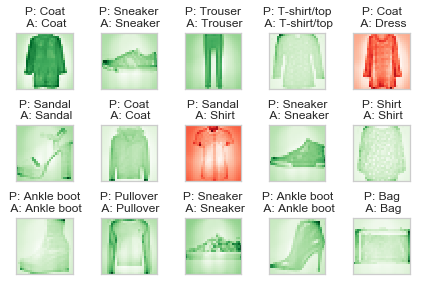

In [64]:
check_random(n=15, x=X_test, y=Y_test, p=pred)